In [81]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt

In [14]:
pokemon = pd.read_csv('pokemon.csv')

In [15]:
pokemon

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,80,82,83,100,100,80,1,False
3,4,Mega Venusaur,Grass,Poison,80,100,123,122,120,80,1,False
4,5,Charmander,Fire,NaN,39,52,43,60,50,65,1,False
...,...,...,...,...,...,...,...,...,...,...,...,...
795,796,Diancie,Rock,Fairy,50,100,150,100,150,50,6,True
796,797,Mega Diancie,Rock,Fairy,50,160,110,160,110,110,6,True
797,798,Hoopa Confined,Psychic,Ghost,80,110,60,150,130,70,6,True
798,799,Hoopa Unbound,Psychic,Dark,80,160,60,170,130,80,6,True


In [16]:
pokemon.isnull().sum()

#               0
Name            1
Type 1          0
Type 2        386
HP              0
Attack          0
Defense         0
Sp. Atk         0
Sp. Def         0
Speed           0
Generation      0
Legendary       0
dtype: int64

In [18]:
pokemon.corr()

,#,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
#,1.000000,0.097712,0.102664,0.094691,0.089199,0.085596,0.012181,0.983428,0.154336
HP,0.097712,1.000000,0.422386,0.239622,0.362380,0.378718,0.175952,0.058683,0.273620
Attack,0.102664,0.422386,1.000000,0.438687,0.396362,0.263990,0.381240,0.051451,0.345408
Defense,0.094691,0.239622,0.438687,1.000000,0.223549,0.510747,0.015227,0.042419,0.246377
Sp. Atk,0.089199,0.362380,0.396362,0.223549,1.000000,0.506121,0.473018,0.036437,0.448907
Sp. Def,0.085596,0.378718,0.263990,0.510747,0.506121,1.000000,0.259133,0.028486,0.363937
Speed,0.012181,0.175952,0.381240,0.015227,0.473018,0.259133,1.000000,-0.023121,0.326715
Generation,0.983428,0.058683,0.051451,0.042419,0.036437,0.028486,-0.023121,1.000000,0.079794
Legendary,0.154336,0.273620,0.345408,0.246377,0.448907,0.363937,0.326715,0.079794,1.000000


In [32]:
pokemon['Type 1'].value_counts()

Water       112
Normal       98
Grass        70
Bug          69
Psychic      57
Fire         52
Electric     44
Rock         44
Ghost        32
Dragon       32
Ground       32
Dark         31
Poison       28
Fighting     27
Steel        27
Ice          24
Fairy        17
Flying        4
Name: Type 1, dtype: int64

In [44]:
pokemon = pokemon.dropna(subset=['Name'])
pokemon.Name

0           Bulbasaur
1             Ivysaur
2            Venusaur
3       Mega Venusaur
4          Charmander
            ...      
795           Diancie
796      Mega Diancie
797    Hoopa Confined
798     Hoopa Unbound
799         Volcanion
Name: Name, Length: 799, dtype: object

In [52]:
pokemon[pokemon['Name'].str.lower().str.contains("pika")]


,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
30,31,Pikachu,Electric,NaN,35,55,40,50,50,90,1,False


In [55]:
pokemon.loc[pokemon.Name.isnull()]

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary


In [56]:
pokemon['Type 2'] = pokemon['Type 2'].fillna('Empty')

In [57]:
pokemon['Type 2'].isnull().sum()

0

In [63]:
pokemon.Legendary = [1 if leg== True else 0  for leg in pokemon.Legendary]

# boolean verileir ntegera çevirdik bu modelimiz için daha iyi bir durum

In [64]:
pokemon.Legendary

0      0
1      0
2      0
3      0
4      0
      ..
795    1
796    1
797    1
798    1
799    1
Name: Legendary, Length: 799, dtype: int64

In [69]:
pokemon['Type 1'].value_counts()

Water       112
Normal       98
Grass        70
Bug          69
Psychic      57
Fire         52
Electric     44
Rock         44
Ghost        32
Dragon       32
Ground       32
Dark         31
Poison       28
Steel        27
Fighting     26
Ice          24
Fairy        17
Flying        4
Name: Type 1, dtype: int64

In [70]:
pokemon['Type 2'].value_counts()

Empty       385
Flying       97
Ground       35
Poison       34
Psychic      33
Fighting     26
Grass        25
Fairy        23
Steel        22
Dark         20
Dragon       18
Rock         14
Water        14
Ghost        14
Ice          14
Fire         12
Electric      6
Normal        4
Bug           3
Name: Type 2, dtype: int64

In [ ]:
# melt data
#seabornda datamızın daha güzel durması için melt ediyoruz

In [66]:
data_new = pokemon.head(5)

In [67]:
melted = pd.melt(frame = data_new,id_vars='Name',value_vars= ['Attack','Defense'])

In [68]:
melted

,Name,variable,value
0,Bulbasaur,Attack,49
1,Ivysaur,Attack,62
2,Venusaur,Attack,82
3,Mega Venusaur,Attack,100
4,Charmander,Attack,52
5,Bulbasaur,Defense,49
6,Ivysaur,Defense,63
7,Venusaur,Defense,83
8,Mega Venusaur,Defense,123
9,Charmander,Defense,43


In [71]:
melted.pivot(index = 'Name', columns='variable',values='value')

variable,Attack,Defense
Name,,
Bulbasaur,49,49
Charmander,52,43
Ivysaur,62,63
Mega Venusaur,100,123
Venusaur,82,83


In [72]:
pokemon.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 799 entries, 0 to 799
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   #           799 non-null    int64 
 1   Name        799 non-null    object
 2   Type 1      799 non-null    object
 3   Type 2      799 non-null    object
 4   HP          799 non-null    int64 
 5   Attack      799 non-null    int64 
 6   Defense     799 non-null    int64 
 7   Sp. Atk     799 non-null    int64 
 8   Sp. Def     799 non-null    int64 
 9   Speed       799 non-null    int64 
 10  Generation  799 non-null    int64 
 11  Legendary   799 non-null    int64 
dtypes: int64(9), object(3)
memory usage: 81.1+ KB


In [75]:
pokemon['Type 1'] = pokemon['Type 1'].astype('category')
pokemon['Type 2'] = pokemon['Type 2'].astype('category')

In [76]:
pokemon.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 799 entries, 0 to 799
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   #           799 non-null    int64   
 1   Name        799 non-null    object  
 2   Type 1      799 non-null    category
 3   Type 2      799 non-null    category
 4   HP          799 non-null    int64   
 5   Attack      799 non-null    int64   
 6   Defense     799 non-null    int64   
 7   Sp. Atk     799 non-null    int64   
 8   Sp. Def     799 non-null    int64   
 9   Speed       799 non-null    int64   
 10  Generation  799 non-null    int64   
 11  Legendary   799 non-null    int64   
dtypes: category(2), int64(9), object(1)
memory usage: 71.8+ KB


<AxesSubplot:>

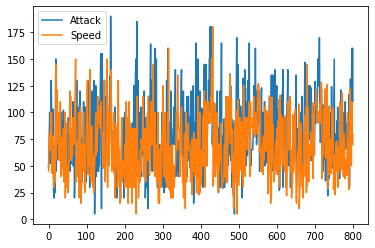

In [83]:
dataforplt1 = pokemon.loc[:,['Attack','Speed']]
dataforplt1.plot()

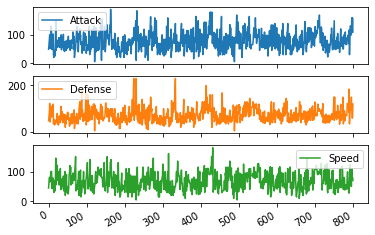

In [86]:
data1 = pokemon.loc[:,["Attack","Defense","Speed"]]
data1.plot(subplots = True)
plt.show()

array([<AxesSubplot:>, <AxesSubplot:>], dtype=object)

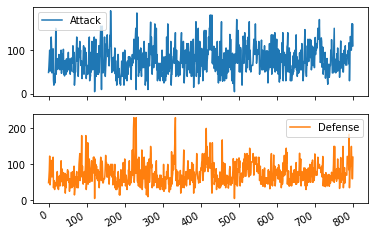

In [89]:
data2 = pokemon.loc[:,['Attack','Defense']]
data2.plot(subplots=True)

In [92]:
specifically_filtered= pokemon[(pokemon["Name"] == "Pikachu")]
specifically_filtered

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
30,31,Pikachu,Electric,Empty,35,55,40,50,50,90,1,0


In [94]:
ff = pokemon[pokemon["Name"] == "Pikachu"]
ff

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
30,31,Pikachu,Electric,Empty,35,55,40,50,50,90,1,0


In [ ]:
# assert test 

In [77]:
assert pokemon['Type 2'].notnull().all() #hiçbir şey döndürmez çünkü boşumuz yok

In [100]:
time_list = ['1992-03-08','1992-04-12']
print(type(time_list[1]))
datetime_object = pd.to_datetime(time_list)
print(type(datetime_object))

<class 'str'>
<class 'pandas.core.indexes.datetimes.DatetimeIndex'>


In [101]:
pok2 = pokemon.head()

In [103]:
date_list = ['1992-01-10','1992-02-10','1992-03-10','1993-03-15','1993-03-16']
datetime_object = pd.to_datetime(date_list)
pok2["date"] = datetime_object
pok2 = pok2.set_index("date")
pok2

<ipython-input-103-5df26da02e90>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pok2["date"] = datetime_object


,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
date,,,,,,,,,,,,
1992-01-10,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,1,0
1992-02-10,2,Ivysaur,Grass,Poison,60,62,63,80,80,60,1,0
1992-03-10,3,Venusaur,Grass,Poison,80,82,83,100,100,80,1,0
1993-03-15,4,Mega Venusaur,Grass,Poison,80,100,123,122,120,80,1,0
1993-03-16,5,Charmander,Fire,Empty,39,52,43,60,50,65,1,0


In [105]:
print(pok2.loc["1993-03-16"])
print(pok2.loc["1992-03-10":"1993-03-16"])

#                      5
Name          Charmander
Type 1              Fire
Type 2             Empty
HP                    39
Attack                52
Defense               43
Sp. Atk               60
Sp. Def               50
Speed                 65
Generation             1
Legendary              0
Name: 1993-03-16 00:00:00, dtype: object
            #           Name Type 1  Type 2  HP  Attack  Defense  Sp. Atk  \
date                                                                        
1992-03-10  3       Venusaur  Grass  Poison  80      82       83      100   
1993-03-15  4  Mega Venusaur  Grass  Poison  80     100      123      122   
1993-03-16  5     Charmander   Fire   Empty  39      52       43       60   

            Sp. Def  Speed  Generation  Legendary  
date                                               
1992-03-10      100     80           1          0  
1993-03-15      120     80           1          0  
1993-03-16       50     65           1          0  


In [106]:
pokemon

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,1,0
1,2,Ivysaur,Grass,Poison,60,62,63,80,80,60,1,0
2,3,Venusaur,Grass,Poison,80,82,83,100,100,80,1,0
3,4,Mega Venusaur,Grass,Poison,80,100,123,122,120,80,1,0
4,5,Charmander,Fire,Empty,39,52,43,60,50,65,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
795,796,Diancie,Rock,Fairy,50,100,150,100,150,50,6,1
796,797,Mega Diancie,Rock,Fairy,50,160,110,160,110,110,6,1
797,798,Hoopa Confined,Psychic,Ghost,80,110,60,150,130,70,6,1
798,799,Hoopa Unbound,Psychic,Dark,80,160,60,170,130,80,6,1


In [110]:
pokemon = pd.read_csv('pokemon.csv')
pokemon = pokemon.set_index('#')   #indexi değiştirip bire atıyoruz
pokemon.head()

,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
#,,,,,,,,,,,
1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,1,False
2,Ivysaur,Grass,Poison,60,62,63,80,80,60,1,False
3,Venusaur,Grass,Poison,80,82,83,100,100,80,1,False
4,Mega Venusaur,Grass,Poison,80,100,123,122,120,80,1,False
5,Charmander,Fire,NaN,39,52,43,60,50,65,1,False


In [111]:
pokemon['HP'][1]

45

In [112]:
pokemon.HP[1]

45

In [114]:
pokemon.loc[1,['HP']]

HP    45
Name: 1, dtype: object

In [115]:
pokemon[['HP','Attack']]

,HP,Attack
#,,
1,45,49
2,60,62
3,80,82
4,80,100
5,39,52
...,...,...
796,50,100
797,50,160
798,80,110


In [117]:
print(type(pokemon['HP']))
print(type(pokemon[['HP']]))

<class 'pandas.core.series.Series'>
<class 'pandas.core.frame.DataFrame'>


In [118]:
pokemon.loc[1:10,"HP":'Defense']

,HP,Attack,Defense
#,,,
1,45,49,49
2,60,62,63
3,80,82,83
4,80,100,123
5,39,52,43
6,58,64,58
7,78,84,78
8,78,130,111
9,78,104,78


In [121]:
pokemon.loc[10:1:-1,"HP":'Defense']

#geri geri yazdırma

,HP,Attack,Defense
#,,,
10,44,48,65
9,78,104,78
8,78,130,111
7,78,84,78
6,58,64,58
5,39,52,43
4,80,100,123
3,80,82,83
2,60,62,63


In [122]:
pokemon.loc[1:10,'Speed':]

,Speed,Generation,Legendary
#,,,
1,45,1,False
2,60,1,False
3,80,1,False
4,80,1,False
5,65,1,False
6,80,1,False
7,100,1,False
8,100,1,False
9,100,1,False


In [127]:
boolean = pokemon.HP>200
boolean

#
1      False
2      False
3      False
4      False
5      False
       ...  
796    False
797    False
798    False
799    False
800    False
Name: HP, Length: 800, dtype: bool

In [128]:
pokemon[boolean]

,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
#,,,,,,,,,,,
122,Chansey,Normal,NaN,250,5,5,35,105,50,1,False
262,Blissey,Normal,NaN,255,10,10,75,135,55,2,False


In [129]:
pokemon[pokemon.Speed<15]

,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
#,,,,,,,,,,,
231,Shuckle,Bug,Rock,20,10,230,10,230,5,2,False
360,Trapinch,Ground,NaN,45,100,45,45,45,10,3,False
487,Bonsly,Rock,NaN,50,80,95,10,45,10,4,False
496,Munchlax,Normal,NaN,135,85,40,40,85,5,4,False
659,Ferroseed,Grass,Steel,44,50,91,24,86,10,5,False


In [130]:
pokemon.HP[pokemon.Speed<15]

#
231     20
360     45
487     50
496    135
659     44
Name: HP, dtype: int64

In [131]:
def div(n):
    return n/2

In [132]:
p1 = pokemon.HP.apply(div)

In [133]:
p1

#
1      22.5
2      30.0
3      40.0
4      40.0
5      19.5
       ... 
796    25.0
797    25.0
798    40.0
799    40.0
800    40.0
Name: HP, Length: 800, dtype: float64

In [134]:
pokemon.HP.apply(lambda n: n/2)

#
1      22.5
2      30.0
3      40.0
4      40.0
5      19.5
       ... 
796    25.0
797    25.0
798    40.0
799    40.0
800    40.0
Name: HP, Length: 800, dtype: float64

In [135]:
pokemon["total power"] = pokemon.Attack + pokemon.Defense

In [136]:
pokemon["total power"] 

#
1       98
2      125
3      165
4      223
5       95
      ... 
796    250
797    270
798    170
799    220
800    230
Name: total power, Length: 800, dtype: int64

In [137]:
pok3 = pokemon.copy()
pok3.index = range(100,900,1)
pok3.head()

,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,total power
100,Bulbasaur,Grass,Poison,45,49,49,65,65,45,1,False,98
101,Ivysaur,Grass,Poison,60,62,63,80,80,60,1,False,125
102,Venusaur,Grass,Poison,80,82,83,100,100,80,1,False,165
103,Mega Venusaur,Grass,Poison,80,100,123,122,120,80,1,False,223
104,Charmander,Fire,NaN,39,52,43,60,50,65,1,False,95


In [ ]:
#hiyerarşik index

In [142]:
pok4 = pokemon.copy()

In [143]:
pok4 = pok4.set_index(['Type 1','Type 2'])
#ilki outer index ikincis inner index
pok4

Name  HP  Attack  Defense  Sp. Atk  Sp. Def  Speed  \
Type 1  Type 2                                                                 
Grass   Poison       Bulbasaur  45      49       49       65       65     45   
        Poison         Ivysaur  60      62       63       80       80     60   
        Poison        Venusaur  80      82       83      100      100     80   
        Poison   Mega Venusaur  80     100      123      122      120     80   
Fire    NaN         Charmander  39      52       43       60       50     65   
...                        ...  ..     ...      ...      ...      ...    ...   
Rock    Fairy          Diancie  50     100      150      100      150     50   
        Fairy     Mega Diancie  50     160      110      160      110    110   
Psychic Ghost   Hoopa Confined  80     110       60      150      130     70   
        Dark     Hoopa Unbound  80     160       60      170      130     80   
Fire    Water        Volcanion  80     110      120      130       90     70   

                Generation  Legendary  total power  
Type 1  Type 2                                      
Grass   Poison           1      False           98  
        Poison           1      False          125  
        Poison           1      False          165  
        Poison           1      False          223  
Fire    NaN              1      False           95  
...                    ...        ...          ...  
Rock    Fairy            6       True          250  
        Fairy            6       True          270  
Psychic Ghost            6       True          170  
        Dark             6       True          220  
Fire    Water            6       True          230  

[800 rows x 10 columns]

In [144]:
pok4.groupby('Type 1').HP.mean()

Type 1
Bug         56.884058
Dark        66.806452
Dragon      83.312500
Electric    59.795455
Fairy       74.117647
Fighting    69.851852
Fire        69.903846
Flying      70.750000
Ghost       64.437500
Grass       67.271429
Ground      73.781250
Ice         72.000000
Normal      77.275510
Poison      67.250000
Psychic     70.631579
Rock        65.363636
Steel       65.222222
Water       72.062500
Name: HP, dtype: float64

In [146]:
pok4.groupby('Type 1')[['HP','Attack']].mean()

,HP,Attack
Type 1,,
Bug,56.884058,70.971014
Dark,66.806452,88.387097
Dragon,83.312500,112.125000
Electric,59.795455,69.090909
Fairy,74.117647,61.529412
Fighting,69.851852,96.777778
Fire,69.903846,84.769231
Flying,70.750000,78.750000
Ghost,64.437500,73.781250
